In [1]:
import sympy as sp
import networkx as nx
import numpy as np
import tqdm

import matplotlib.pyplot as plt

import linearframework.graph_operations as g_ops
import linearframework.ca_recurrence as ca
import linearframework.linear_framework_results as lfr
import linearframework.generalized_aldous_schepp as gas

The goal of this notebook is to perform some numerical analysis on the generalized randomness parameter of random graphs with uniform edge weights.

In [2]:
def edges_to_uniform_weight(edges):
    edge_to_uniform_sym = {}
    e_r = sp.symbols('e_r')
    for edge in edges:
        edge_to_uniform_sym[edge] = 1
    return edge_to_uniform_sym

edges_to_uniform_weight([('1', '2'), ('2', '3')])

{('1', '2'): 1, ('2', '3'): 1}

True


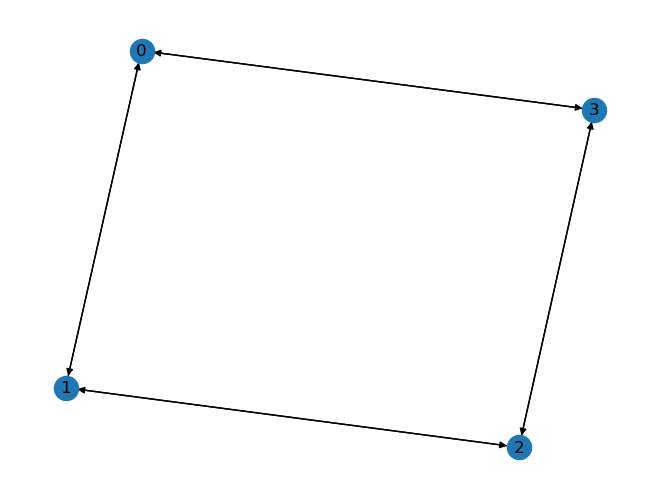

In [3]:
num_vertices = 4
edge_prob = 0.5
random_graph = nx.fast_gnp_random_graph(num_vertices, edge_prob, directed=True)

pos = nx.spring_layout(nx.complete_graph(num_vertices))

print(nx.has_path(random_graph, 0, 3))
nx.draw(random_graph, with_labels=True)

In [4]:
num_vertices = 4
edge_prob = 0.5

num_samples = 100

sm_list = []
edge_to_weight_list = []


pbar = tqdm.tqdm(total=num_samples)
while len(sm_list) < num_samples:
        
    source = 0
    target = num_vertices - 1
    moment = 3

    random_graph = nx.fast_gnp_random_graph(num_vertices, edge_prob, directed=True)

    if nx.has_path(random_graph, source, target):

        edge_to_weight = g_ops.edges_to_random_weight_dict(random_graph.edges())
        edge_to_sym = g_ops.edge_to_sym_from_edge_to_weight(edge_to_weight)
        edge_to_uniform_weight = edges_to_uniform_weight(edge_to_weight.keys())

        source = str(source)
        target = str(target)

        graph = g_ops.dict_to_graph(edge_to_weight)
        sym_lap = ca.generate_sym_laplacian(graph, edge_to_sym)
        n = len(graph.nodes)
        Q_n_minus_2 = ca.get_sigma_Q_k(sym_lap, n-2)[1]
        
        numerator = lfr.ca_kth_moment_numerator(graph,  sym_lap, Q_n_minus_2, source, target, moment)
        denominator = lfr.ca_kth_moment_numerator(graph,  sym_lap, Q_n_minus_2, source, target, 1) ** moment

        if denominator != 0:
            uniform_sym_dict = g_ops.make_sym_to_weight(edge_to_uniform_weight, edge_to_sym)
            s_m = sp.simplify(numerator / denominator).evalf(subs=uniform_sym_dict)
            
            if s_m.is_Add or s_m.is_Mul:
                s_m = sp.simplify(str(s_m))

            sm_list.append(float(s_m))
            edge_to_weight_list.append(edge_to_weight)

            pbar.update(1)
pbar.close()
        
len(sm_list)

100%|██████████| 100/100 [03:19<00:00,  1.99s/it]


100

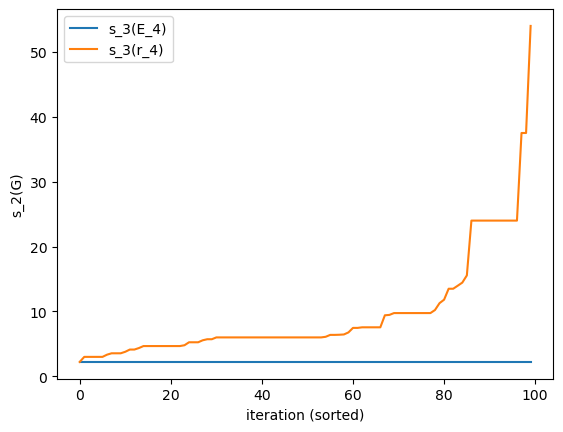

In [5]:
s2_e4 = gas.guzman_alca_equation(num_vertices, moment)

s2_e4_array = np.ones(num_samples) * s2_e4

plt.plot(s2_e4_array, label=f"s_{moment}(E_{num_vertices})")
plt.plot(np.sort(sm_list), label=(f's_{moment}(r_{num_vertices})'))
plt.legend()
plt.ylabel('s_2(G)')
plt.xlabel('iteration (sorted)')
plt.show()

In [9]:
sm_list[0]

4.361111111111111

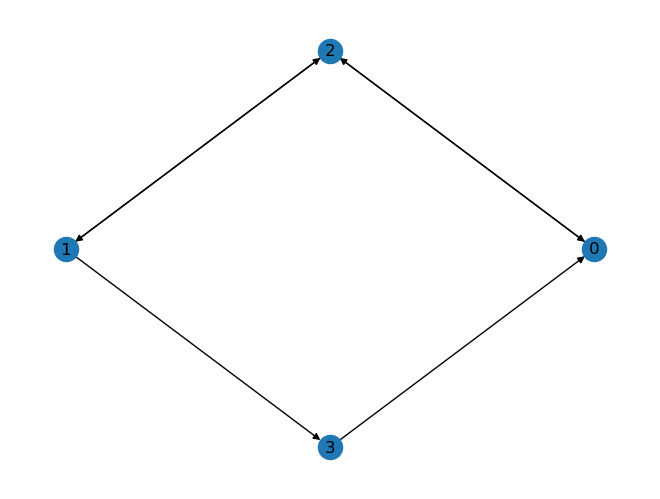

In [7]:
ex_g = g_ops.dict_to_graph(edge_to_weight_list[0])
 
nx.draw(ex_g, pos=nx.circular_layout(ex_g), with_labels=True)

In [8]:
gas.guzman_alca_equation(1000, 2)

1.001001001001001